In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['normal','abnormal']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)                     

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():

    datasets = [r'train', r'test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
def suggestions1():
    if (pred_labels==0):
        print("NORMAL:Everything looks fine")
        print("Go for regular checkup")    
    elif (pred_labels==1):
        print("ABNORMAL:Seems to have cancer")
        print("Consult the doctor immediately")

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|██████████| 148/148 [00:02<00:00, 51.64it/s]


Loading test


100%|██████████| 88/88 [00:01<00:00, 60.31it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 303
Number of testing examples: 165
Each image is of size: (150, 150)


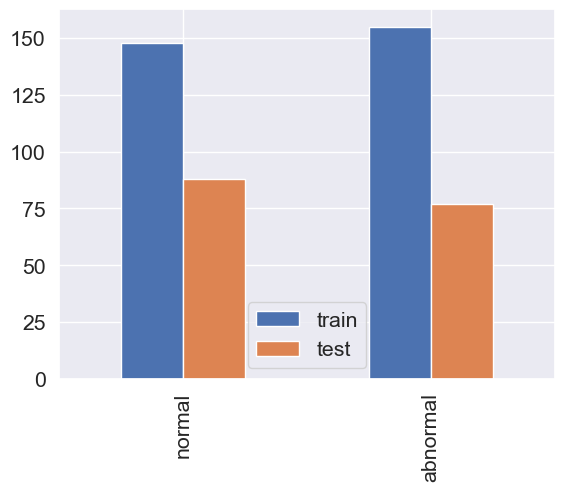

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with its corresponding labels
    """
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

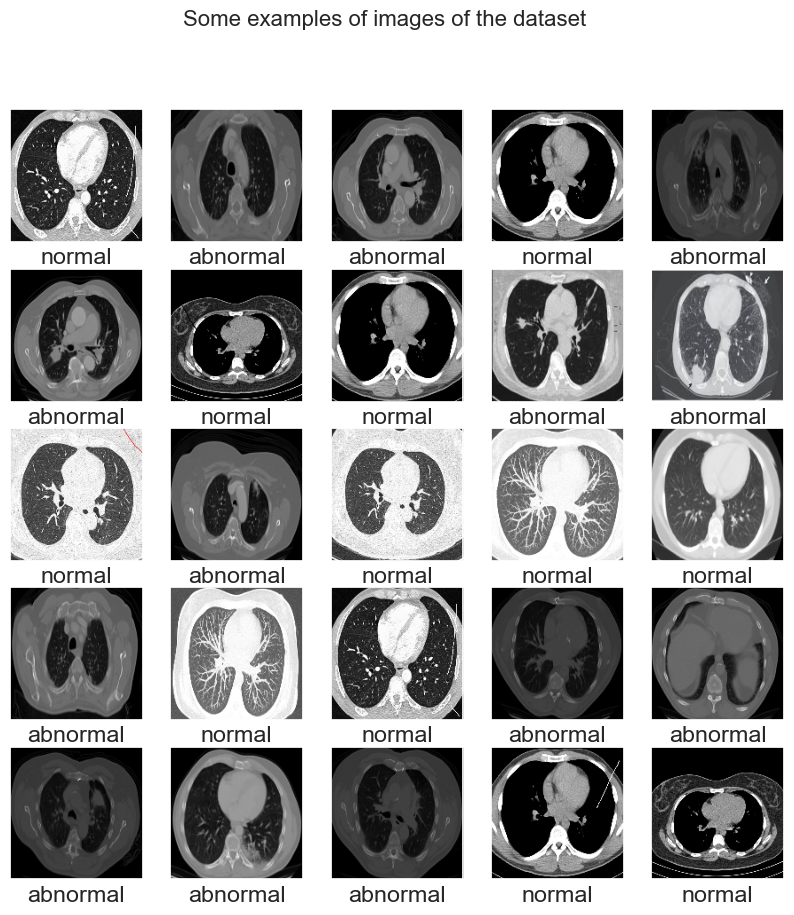

In [12]:
display_examples(class_names, train_images, train_labels)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

C:\Users\Spandana\anaconda3\envs\Lung\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 642ms/step - accuracy: 0.2984 - loss: 2.6800 - val_accuracy: 0.5410 - val_loss: 1.1839
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.6048 - loss: 0.9933 - val_accuracy: 0.4590 - val_loss: 0.6117
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step - accuracy: 0.5464 - loss: 0.5658 - val_accuracy: 0.9180 - val_loss: 0.4618
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - accuracy: 0.8942 - loss: 0.4035 - val_accuracy: 0.8197 - val_loss: 0.4513
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - accuracy: 0.8815 - loss: 0.3900 - val_accuracy: 0.9508 - val_loss: 0.3406
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.9407 - loss: 0.2968 - val_accuracy: 0.9672 - val_loss: 0.2461
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 453ms/step - accuracy: 0.9625 - loss: 0.2219 - val_accuracy: 0.9836 - val_loss: 0.1740
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step - accuracy: 0.9784 - loss: 0.1303 - val_accuracy: 1.0000 - val_loss:

In [16]:
test_loss = model.evaluate(test_images, test_labels)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 3.6019e-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
ABNORMAL:Seems to have cancer
Consult the doctor immediately
[1]


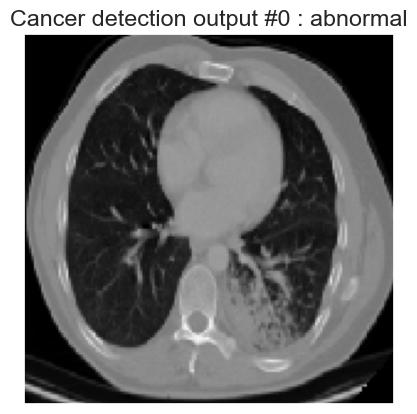

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"test/abnormal/000002 (4).png", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
suggestions1()
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Cancer detection output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
NORMAL:Everything looks fine
Go for regular checkup
[0]


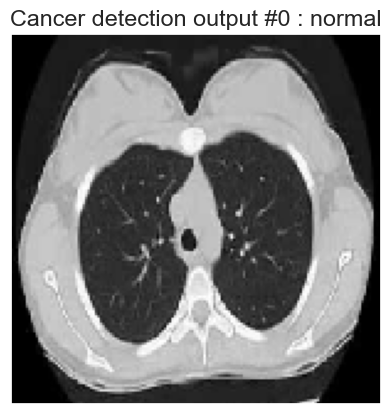

In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"test/normal/10.png", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
suggestions1()
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Cancer detection output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

([<matplotlib.patches.Wedge at 0x1f94cc0a310>,
 [Text(0.03990911956276208, 1.0992757898615457, 'normal'),
  Text(-0.039909119562761976, -1.0992757898615457, 'abnormal')])

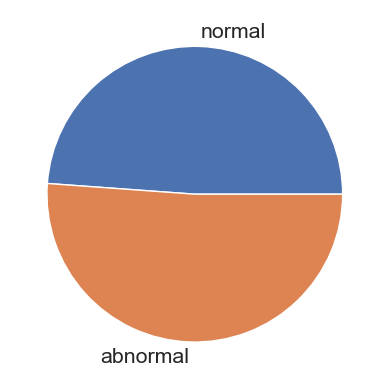

In [21]:
plt.pie(train_counts, explode=(0,0,), labels=class_names)